In [2]:
import pandas as pd
import networkx as nx

# Load the disease-gene association data
disease_gene_data = pd.read_csv('/Users/nicolacecere/GitHub/UPM-Master/Complex-data-health/data/disease_gene.tsv', sep='\t')

# Create a new bipartite graph
B = nx.Graph()

# Add nodes with the bipartite attribute
B.add_nodes_from(disease_gene_data['geneSymbol'], bipartite=0)  # Add genes
B.add_nodes_from(disease_gene_data['diseaseName'], bipartite=1) # Add diseases

# Add edges between genes and diseases
for _, row in disease_gene_data.iterrows():
    B.add_edge(row['geneSymbol'], row['diseaseName'])

# Check if the graph is bipartite
is_bipartite = nx.is_bipartite(B)
print(f"Graph is bipartite: {is_bipartite}")


Graph is bipartite: True


In [5]:
from networkx.algorithms import bipartite

# Extracting the set of disease nodes from the bipartite graph
disease_nodes = set(n for n, d in B.nodes(data=True) if d['bipartite'] == 1)

# Projecting the bipartite graph onto disease nodes
projected_disease_graph = bipartite.projected_graph(B, disease_nodes)

# Now, 'projected_disease_graph' is a graph where nodes are diseases and edges represent shared genes


In [7]:
# Ensure the graph is connected before calculating the diameter
if nx.is_connected(projected_disease_graph):
    diameter = nx.diameter(projected_disease_graph)
    print(f"Diameter of the network: {diameter}")
else:
    print("The network is not connected, so diameter cannot be calculated.")


The network is not connected, so diameter cannot be calculated.


In [8]:
connected_components = nx.number_connected_components(projected_disease_graph)
print(f"Number of connected components: {connected_components}")


Number of connected components: 417


In [9]:
largest_cc = max(nx.connected_components(projected_disease_graph), key=len)
print(f"Size of the largest connected component: {len(largest_cc)}")


Size of the largest connected component: 10649


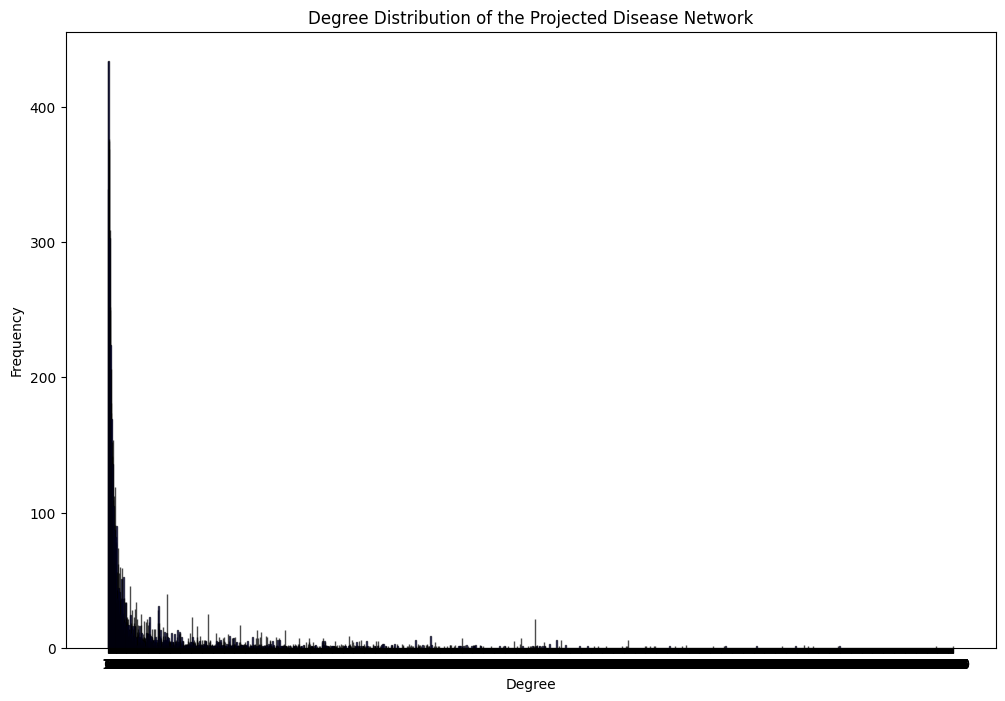

In [12]:
import matplotlib.pyplot as plt

# Calculate the degrees of each node in the projected disease network
degree_sequence = [d for n, d in projected_disease_graph.degree()]

# Create the histogram
plt.figure(figsize=(12, 8))
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 1), alpha=0.7, color='blue', edgecolor='black')

plt.title('Degree Distribution of the Projected Disease Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xticks(range(min(degree_sequence), max(degree_sequence) + 1))

plt.show()


In [10]:
# You can define a threshold or just take the top X diseases with the highest degree
top_diseases = sorted(projected_disease_graph.degree, key=lambda x: x[1], reverse=True)[:10]  # Top 10 for example
print("Top 10 hub diseases:")
for disease, degree in top_diseases:
    print(f"{disease}: {degree}")


Top 10 hub diseases:
Malignant neoplasm of breast: 3460
Schizophrenia: 3387
Malignant neoplasm of prostate: 2993
Prostatic Neoplasms: 2988
Breast Carcinoma: 2884
Mammary Neoplasms: 2863
Mammary Neoplasms, Human: 2848
Mammary Carcinoma, Human: 2848
Colorectal Carcinoma: 2813
Liver Cirrhosis, Experimental: 2757


In [13]:
import numpy as np

# Select the largest connected component for analysis
largest_cc_nodes = max(nx.connected_components(projected_disease_graph), key=len)
largest_cc_graph = projected_disease_graph.subgraph(largest_cc_nodes)

# Calculate shortest path lengths for all pairs in the largest connected component
path_length_dict = dict(nx.shortest_path_length(largest_cc_graph))
all_path_lengths = [path_length_dict[node1][node2] for node1 in largest_cc_graph for node2 in largest_cc_graph if node1 != node2]


In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(all_path_lengths, bins=range(min(all_path_lengths), max(all_path_lengths) + 1), color='green', alpha=0.7)

plt.title('Shortest Path Length Distribution in the Projected Disease Network')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.xticks(range(min(all_path_lengths), max(all_path_lengths) + 1))

plt.show()
